## MNIST Dataset
#### The MNIST database of handwritten digits

**Problem to solve** : The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.

Importing initial libraries

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten

from sklearn.metrics import classification_report,confusion_matrix

Loding MNIST Dataset 

In [397]:
objects = tf.keras.datasets.mnist

In [398]:
(training_images , training_labels), (test_images , test_labels) = objects.load_data()

For loop to plot 9 images to see how input image look like

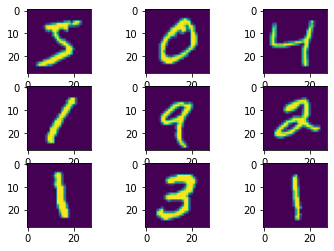

In [399]:
for i in range(9):
  # define subplot 
  plt.subplot(330+1+i)
  # plot raw pixel data
  plt.imshow(training_images[i])

In [400]:
training_images.imag.shape 

(60000, 28, 28)

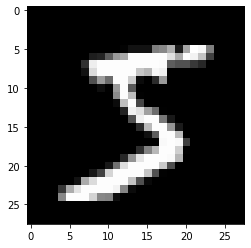

In [401]:
plt.imshow(training_images[0],cmap='gray')

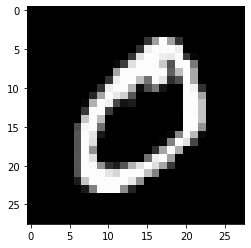

In [402]:
plt.imshow(training_images[1],cmap='gray')

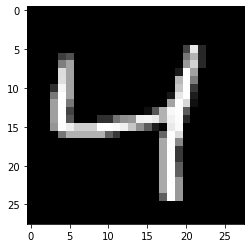

In [403]:
plt.imshow(training_images[2],cmap='gray')

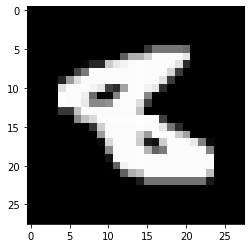

In [404]:
plt.imshow(training_images[528],cmap='gray')

In [405]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

We print a shape of images which is (60000,28,28) basically it means it is a collection of 60000 images of 28 * 28 pixel.And the pixel intensity range is from 0 to 255.

flatten 28*28 images to 784 vector for each image

In [406]:
num_pixels = training_images.shape[1] * training_images.shape[2]

In [407]:
training_images = training_images.reshape((training_images.shape[0] , num_pixels)).astype('float32')
test_images     = test_images.reshape((test_images.shape[0] , num_pixels)).astype('float32')

In [408]:
training_images = training_images /255.0
test_images = test_images/255.0

In [409]:
num_pixels

784

In [410]:
training_images.shape

(60000, 784)

In [411]:
test_images.shape

(10000, 784)

We performed normalization in the scale of 0 to 1by dividing by 255.0.

In [412]:
# Applying PCA function on training_images
# and testing set of X component
from sklearn.decomposition import PCA
  

pca = PCA(n_components = 2)
pca.fit(training_images)
z = pca.transform(training_images)



In [413]:
z.shape

(60000, 2)

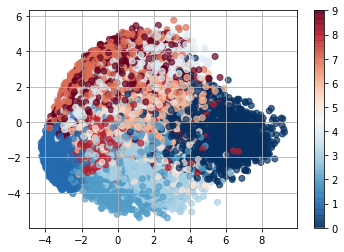

In [414]:
plt.scatter(z[:,0] , z[:,1],c=training_labels,cmap='RdBu_r',alpha=0.7)
plt.colorbar()
plt.grid('on')

In [415]:
training_images.shape

(60000, 784)

one hot encode outputs


In [416]:
num_classes = test_images.shape[1]

In [417]:
num_classes

784

## ANN

In [418]:
# initializing ann
model = Sequential()

In [419]:
# adding the first input layer and the first hidden layer
model.add(Dense(num_classes,input_dim = num_pixels,activation='softmax'))

In [420]:
## model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 784)               615440    
Total params: 615,440
Trainable params: 615,440
Non-trainable params: 0
_________________________________________________________________


In [421]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [422]:
model_history = model.fit(training_images,training_labels,batch_size = 15, epochs = 20,validation_data=(training_images,training_labels))

Epoch 1/20
4000/4000 [==============================] - 28s 7ms/step - loss: 0.4422 - accuracy: 0.8895 - val_loss: 0.2964 - val_accuracy: 0.9181
Epoch 2/20
4000/4000 [==============================] - 25s 6ms/step - loss: 0.2916 - accuracy: 0.9191 - val_loss: 0.2706 - val_accuracy: 0.9253
Epoch 3/20
4000/4000 [==============================] - 29s 7ms/step - loss: 0.2756 - accuracy: 0.9232 - val_loss: 0.2669 - val_accuracy: 0.9255
Epoch 4/20
4000/4000 [==============================] - 28s 7ms/step - loss: 0.2679 - accuracy: 0.9259 - val_loss: 0.2582 - val_accuracy: 0.9292
Epoch 5/20
4000/4000 [==============================] - 25s 6ms/step - loss: 0.2626 - accuracy: 0.9282 - val_loss: 0.2542 - val_accuracy: 0.9299
Epoch 6/20
4000/4000 [==============================] - 24s 6ms/step - loss: 0.2581 - accuracy: 0.9281 - val_loss: 0.2483 - val_accuracy: 0.9307
Epoch 7/20
4000/4000 [==============================] - 28s 7ms/step - loss: 0.2560 - accuracy: 0.9295 - val_loss: 0.2480 - val_ac

# Training vs Test loss

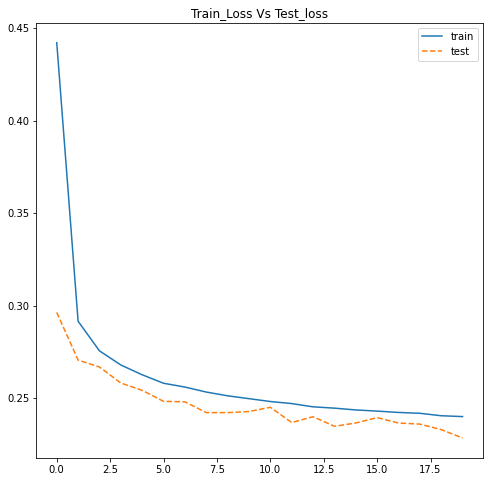

In [423]:
fig , ax = plt.subplots(figsize=(8,8))
plt.title('Train_Loss Vs Test_loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'],label='test',linestyle='--')
plt.legend()
plt.show()

###  Train_Accuracy vs. Test_Accuracy

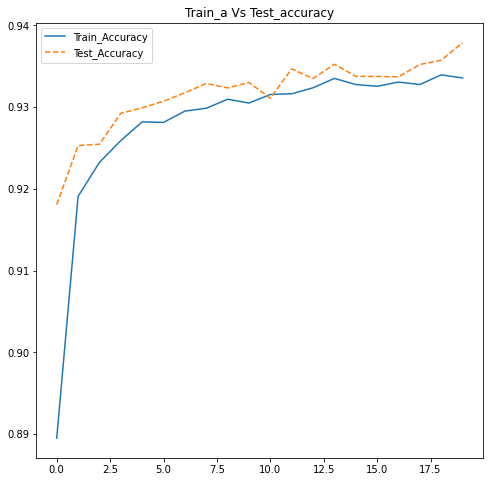

In [424]:
fig , ax = plt.subplots(figsize=(8,8))
plt.title('Train_a Vs Test_accuracy')
plt.plot(model_history.history['accuracy'], label='Train_Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Test_Accuracy',linestyle='--')
plt.legend()

In [425]:
print(test_labels[0])

7


In [427]:
## final evaluation of model

In [431]:
score = model_history.model.evaluate(test_images,test_labels,verbose=0)

In [432]:
print("Model Error : %.2f%%" % (100-score[1]*100))

Model Error : 7.21%


Checking  performance & Accuracy manually

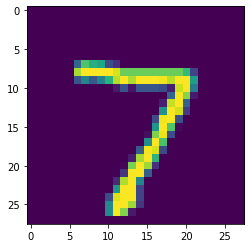

In [437]:
plt.imshow(test_images[0].reshape(28,28))

In [438]:
prediction = model.predict(test_images)

In [439]:
print(np.argmax(prediction[0]))

7


## Conclusion

You should see the output below .This very simple network defined in very few lines of code achieves a respectable error rate 7.21%.
In this notebook we discovered the MNIST handwritting digit recognition problem and deep learning models developed in python using the keras library that are capable of achieving good results.

Thank You!


Manish Mohan Kamble